# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# Read classes and text labels
labels = np.genfromtxt('signnames.csv', delimiter=',', dtype=None, skip_header=True)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

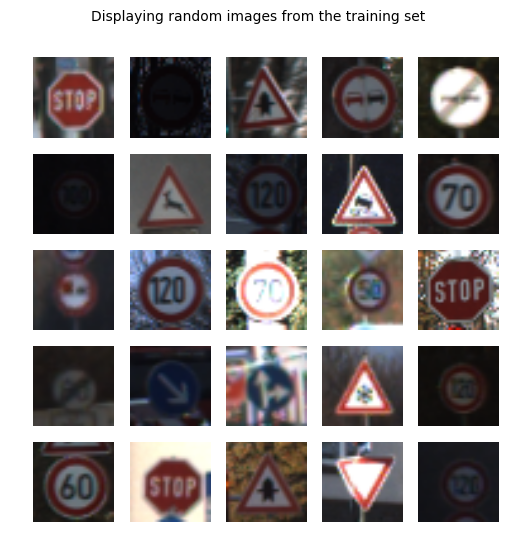

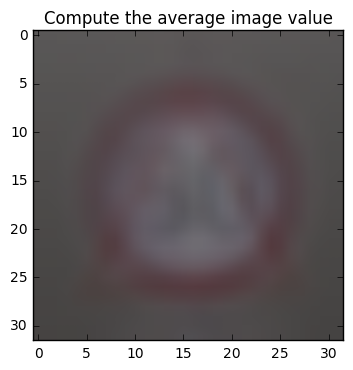

Compute the average pixel value:  82.665052346


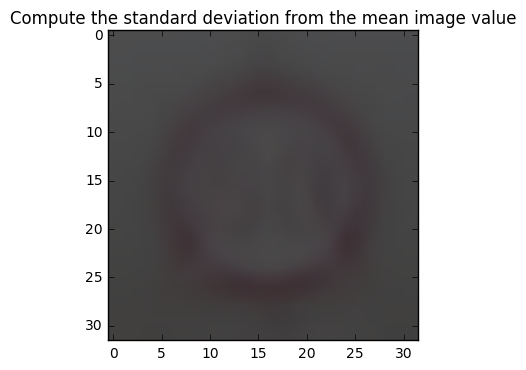

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Displaying random images from the training set
plt.figure(figsize=(6,6))
plot_number = 0
number_subplots = 5
random_im_idx = np.random.randint(n_train, size=number_subplots*number_subplots)
for plot_number in range(number_subplots*number_subplots):
    plt.subplot(number_subplots, number_subplots, plot_number + 1)
    image = X_train[random_im_idx[plot_number]]
    plt.imshow(image)
    plt.axis('off')
plt.suptitle('Displaying random images from the training set')
plt.show()

# Compute the average pixel value
mean_img = np.mean(X_train,axis=0)
plt.imshow(mean_img.astype(np.uint8))
plt.title('Compute the average image value')
plt.show()

mean_pixel = np.mean(X_train)
print('Compute the average pixel value: ', mean_pixel)


# Compute the standard deviation on the pixel 
# value (brighter means greater variance)
std_img = np.std(X_train,axis=0)
plt.imshow((std_img).astype(np.uint8))
plt.title('Compute the standard deviation from the mean image value')
plt.show()

### Histogram for pixel value distribution for one image
Discovering data distribution on one randomly selected image.
This is to start creating some understanding of the type of images part of the training set.

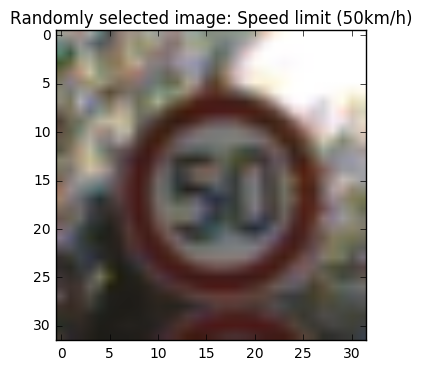

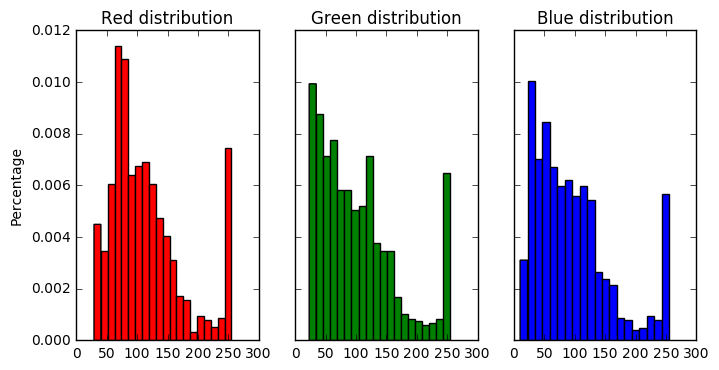

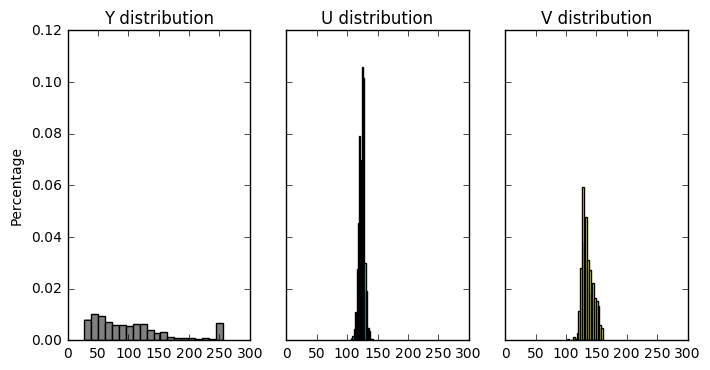

Exploring effect of biasing data values on image pixel values


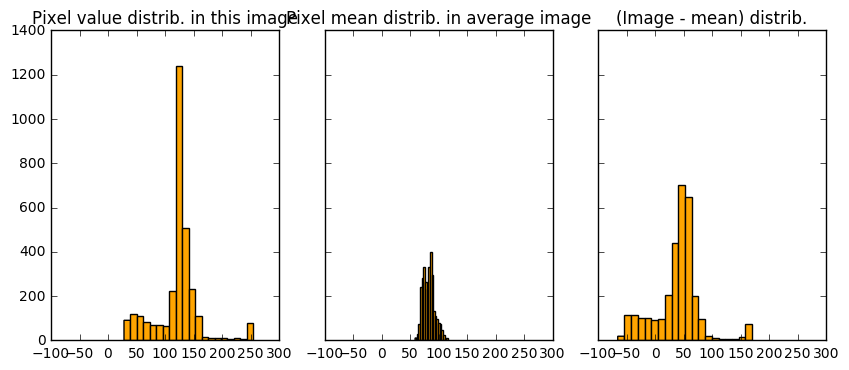

In [4]:
# Histogram for pixel value distribution for one image
# and comparing to statistical values (mean and std)
bins = 20
selected_img_idx = np.random.randint(n_train)
selected_img = X_train[selected_img_idx]
plt.imshow(selected_img)
label_name = labels[y_train[selected_img_idx]][1]
plt.title('Randomly selected image: {}'.format(label_name.decode('UTF-8')))
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)
axs[0].hist((selected_img[:,:,0]).ravel(), bins, color='red',  normed=True)
axs[0].set_title('Red distribution')
axs[0].set_ylabel('Percentage')
axs[1].hist((selected_img[:,:,1]).ravel(), bins, color='green',  normed=True)
axs[1].set_title('Green distribution')
axs[2].hist((selected_img[:,:,2]).ravel(), bins, color='blue',  normed=True)
axs[2].set_title('Blue distribution')
plt.show()

# Exploring pixel distribution on YUV channels
import cv2
selected_img = cv2.cvtColor(selected_img, cv2.COLOR_BGR2YUV)
fig, axs = plt.subplots(1, 3, figsize=(8, 4), sharey=True, sharex=True)
axs[0].hist((selected_img[:,:,0]).ravel(), bins, color='gray',  normed=True)
axs[0].set_title('Y distribution')
axs[0].set_ylabel('Percentage')
axs[1].hist((selected_img[:,:,1]).ravel(), bins, color='cyan',  normed=True)
axs[1].set_title('U distribution')
axs[2].hist((selected_img[:,:,2]).ravel(), bins, color='yellow',  normed=True)
axs[2].set_title('V distribution')
plt.show()

print('Exploring effect of biasing data values on image pixel values')
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharey=True, sharex=True)
axs[0].hist((selected_img).ravel(), bins, color='orange')
axs[0].set_title('Pixel value distrib. in this image')
axs[1].hist((mean_img).ravel(), bins , color='orange')
axs[1].set_title('Pixel mean distrib. in average image')
axs[2].hist((selected_img - mean_img).ravel(), bins, color='orange')
axs[2].set_title('(Image - mean) distrib.')
plt.show()

### What is the distribution of the data (per label)

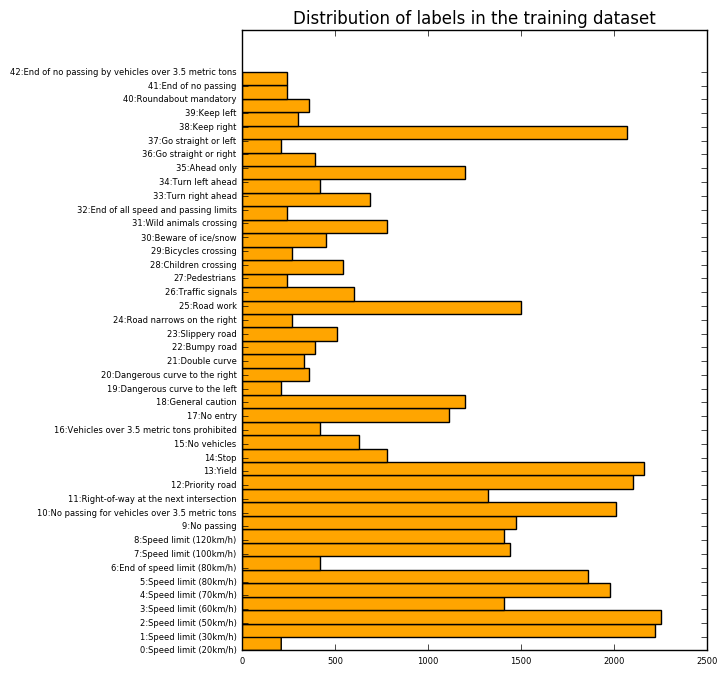

In [5]:
#What is the distribution of the data in the training file (per label)
hist_xticks = ['{}:{}'.format(t[0],t[1].decode('UTF-8')) for t in labels]
#print(hist_xticks)

fig = plt.figure(figsize=(6,8))

ax = plt.subplot() # Defines ax variable by creating an empty plot

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(6) # Size here overrides font_prop
    
plt.hist(y_train, bins=len(labels), orientation="horizontal", color='orange')
plt.yticks( np.arange(len(labels)), hist_xticks,  rotation=0)
plt.title('Distribution of labels in the training dataset')
plt.show()

We can see have a severe *data imbalance*. We need to correct by equalising the classes in the training set. Otherwise our loss function will return a good training accuracy even though we fail to classify the low frequency classes.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [6]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

Let's explore some statistical distributions in the dataset.

(39209, 32, 32, 3)
(12630, 32, 32, 3)


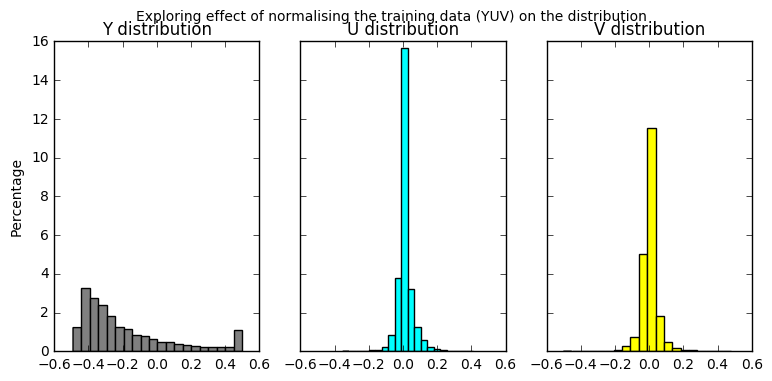

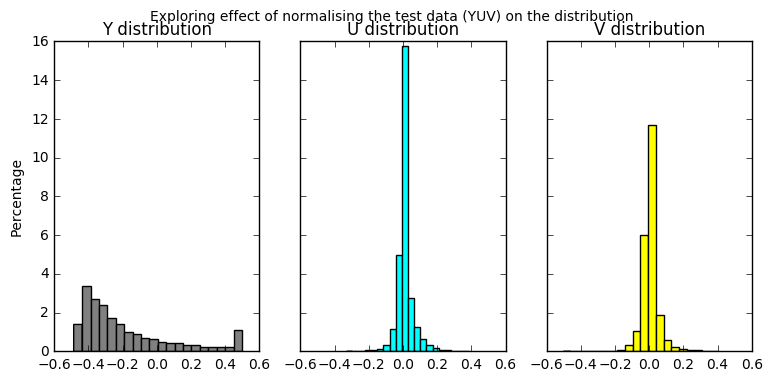

In [7]:
X_train_yuv = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2YUV) for image in X_train])
X_test_yuv =  np.array([cv2.cvtColor(image, cv2.COLOR_RGB2YUV) for image in X_test])
X_train_norm = (X_train_yuv-128.)/255
X_test_norm = (X_test_yuv-128.)/255

fig, axs = plt.subplots(1, 3, figsize=(9, 4), sharey=True, sharex=True)
axs[0].set_ylabel('Percentage')
axs[0].hist((X_train_norm[:,:,:,0]).ravel(), bins, color='gray',  normed=True)
axs[0].set_title('Y distribution')
axs[1].hist((X_train_norm[:,:,:,1]).ravel(), bins, color='cyan',  normed=True)
axs[1].set_title('U distribution')
axs[2].hist((X_train_norm[:,:,:,2]).ravel(), bins, color='yellow',  normed=True)
axs[2].set_title('V distribution')
plt.suptitle('Exploring effect of normalising the training data (YUV) on the distribution')
print(X_train_norm.shape)

fig, axs = plt.subplots(1, 3, figsize=(9, 4), sharey=True, sharex=True)
axs[0].set_ylabel('Percentage')
axs[0].hist((X_test_norm[:,:,:,0]).ravel(), bins, color='gray',  normed=True)
axs[0].set_title('Y distribution')
axs[1].hist((X_test_norm[:,:,:,1]).ravel(), bins, color='cyan',  normed=True)
axs[1].set_title('U distribution')
axs[2].hist((X_test_norm[:,:,:,2]).ravel(), bins, color='yellow',  normed=True)
axs[2].set_title('V distribution')
plt.suptitle('Exploring effect of normalising the test data (YUV) on the distribution')
print(X_test_norm.shape)

plt.show()

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
In his paper "Traffic Sign Recognition with Multi-Scale Convolutional Networks", Yann Lecun is suggesting using the YUV colorspace and has actually achieved a higher recognition rate with the Y channel only.

In line with his result, I have converted the images *from RGB to YUV*.
I have also normalised the input data in order to improve the weights initialization using the maximum values possible on YUV : 255 and 0. I also recentred the data values around 128.
This normalisation scheme is adequate for image because it is simple and the data is bounded.

It is midly insteresting to see how well the data seems to fits a normal distribution on the U and V channels as opposed to the YUV channel. This is the case on both datasets.

Before jumping to statistical conclusions, let's just remember that on one example (in the previous section) we have seen that the U and V channels presented a bell-shaped statistical non-zero mean distribution.


In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.



##### Data augmentation
We generate images additional images in order to balance the training set an improve the test score.

In [9]:
# generateImage : This function will be used to augment the dataset
import math

def generateTransformedImage(image_in):
    """
    image_in: image input (expected to be normalised between -1 and 1)
    image:    image output generated after geometric transformations
              the image output is also normalised
    """
    image = np.copy(image_in)
    rows,cols = image.shape[0:2]

    # Rotation Matrix
    import random
    rotation_angle = random.uniform(-15, 15)  
    zoom_ratio = random.uniform(.95, 1.05)  
    rotation_Mat = cv2.getRotationMatrix2D((cols/2,rows/2),
                                           rotation_angle,zoom_ratio)
    rotation_Mat = np.vstack((rotation_Mat,np.array([0,0,1.])))
    
    # Translation Matrix
    # Get random numbers for translation values
    random_translations = np.random.uniform(-3, 3, 2).astype('float32')
    tx = random_translations[0]
    ty = random_translations[1]
    translation_Mat = np.float32([[1, 0, tx],[0, 1, ty],[0, 0, 1]])
    M = np.matmul(rotation_Mat,translation_Mat)
    
    # Apply composition of rotation and translation to image to get an affine transformation
    image = cv2.warpAffine(image, M[0:2,:] ,(cols,rows))

    # Perspective transfomation ( we applied an affine transformation to get a correlated rotation and translation first)
    pts1 = np.float32([[1,1],[28,1],[1,28],[28,28]])
    random_deltas = np.random.uniform(-2, 2, 8).astype('float32')
    pts2 = pts1 + random_deltas.reshape(4,2)
    M = cv2.getPerspectiveTransform(pts1,pts2)
    image = cv2.warpPerspective(image,M,(cols,rows))

    # Random change in Brightness
    brightn_gain = random.uniform(0.7, 1.3)
    brightn_bias = random.uniform(-0.1, 0.1)*np.max(image[:,:,0])
    image[:,:,0] = np.clip(image[:,:,0]*brightn_gain+brightn_bias,-1,1)
    return image
    



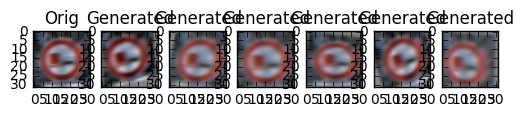

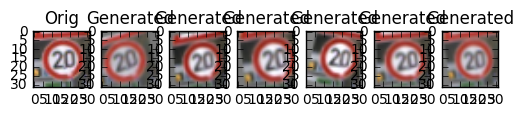

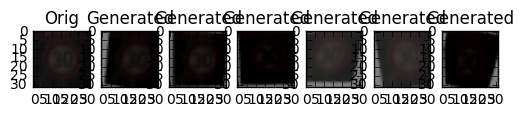

In [10]:
## Testing image generation function

def testingImageGenerator(image_in):
    # Apply transformation
    
    numberImagesPlot = 6
    fig, axs = plt.subplots(1, numberImagesPlot+1)

    axs[0].imshow(cv2.cvtColor(np.uint8(image_in*255+128), cv2.COLOR_YUV2RGB))
    axs[0].set_title('Orig')

#    imageList = list()
    for i in range(numberImagesPlot):
        image = generateTransformedImage(image_in)
        # Denormalize and put back to RGB for display
        image = cv2.cvtColor(np.uint8(np.clip(image*255+128, 0, 255)), cv2.COLOR_YUV2RGB)
#        imageList.append(image)
        
        axs[i+1].imshow(image)
        axs[i+1].set_title('Generated')

    plt.show()


# Load image
testingImageGenerator(X_train_norm[15566])
testingImageGenerator(X_train_norm[15])
testingImageGenerator(X_train_norm[581])

In [11]:
def generateAllImages(num_image_per_categ, X_train_norm, y_train, labels):
    """
    num_image_per_categ (input):  generate this number of images per category
    X_train_norm (input): Normalised vector of images to be used in training set
    y_train (input): Normalised vector of output label index to be used in training set
    labels (input): Dataset image labels (43 values indexed)
    (X_traingen_norm_list,y_traingen_list) (output): returns the normalised generated 
    """
    
    # We can see that the training set is not uniform 
    y_train_distrib, _ = np.histogram(y_train, bins=len(labels))
    print('Number of training images per label\n', y_train_distrib)



    # Let's see how many images we need to add per class
    num_to_generate = num_image_per_categ - y_train_distrib
    print('Number of images to generate per label:\n', num_to_generate)

    # Lets generate the addequate number of images in order to make the training set uniform

    y_traingen_list = list()
    X_traingen_norm_list = list()

    index = 0

    # For each label lets generate the required number of images per category
    for cat_idx in range(len(num_to_generate)):
        print('{}) generating {} images for: {}'.
              format(cat_idx, num_to_generate[cat_idx],
                     labels[cat_idx][1].decode('UTF-8')))

        for j in range(num_to_generate[cat_idx]):
            # For each image to be generated in category i
            # Get random image in set of labels
            y_train_sel_idx = np.where(y_train==cat_idx)
            X_train_norm_sel = X_train_norm[np.random.choice(y_train_sel_idx[0], 1)].reshape( X_train_norm.shape[1],
                                X_train_norm.shape[2], X_train_norm.shape[3])
            # Apply image transformation to create a new image, then reshape
            X_train_norm_sel = generateTransformedImage(X_train_norm_sel)
            X_traingen_norm_list.append(X_train_norm_sel)
            y_traingen_list.append(cat_idx) 
            index += 1

    print('Images generated : ', index)
    return X_traingen_norm_list, y_traingen_list

In [12]:
# We want to generate this number of images per category
NUM_IMAGES_PER_CATEG = 2500

X_traingen_norm_list, y_traingen_list = generateAllImages(NUM_IMAGES_PER_CATEG,
                                                          X_train_norm, y_train, labels)

Number of training images per label
 [ 210 2220 2250 1410 1980 1860  420 1440 1410 1470 2010 1320 2100 2160  780
  630  420 1110 1200  210  360  330  390  510  270 1500  600  240  540  270
  450  780  240  689  420 1200  390  210 2070  300  360  240  240]
Number of images to generate per label:
 [2290  280  250 1090  520  640 2080 1060 1090 1030  490 1180  400  340 1720
 1870 2080 1390 1300 2290 2140 2170 2110 1990 2230 1000 1900 2260 1960 2230
 2050 1720 2260 1811 2080 1300 2110 2290  430 2200 2140 2260 2260]
0) generating 2290 images for: Speed limit (20km/h)
1) generating 280 images for: Speed limit (30km/h)
2) generating 250 images for: Speed limit (50km/h)
3) generating 1090 images for: Speed limit (60km/h)
4) generating 520 images for: Speed limit (70km/h)
5) generating 640 images for: Speed limit (80km/h)
6) generating 2080 images for: End of speed limit (80km/h)
7) generating 1060 images for: Speed limit (100km/h)
8) generating 1090 images for: Speed limit (120km/h)
9) generati

In [13]:
# Let's convert the lists of generated normalised YUV images to numpy arrays
X_traingen_norm = np.array(X_traingen_norm_list)
y_traingen = np.array(y_traingen_list)


# Combine generated images to original training set
print('Combining images in single dataset')
X_train_all_norm = np.concatenate((X_train_norm,X_traingen_norm), axis = 0)
y_train_all_gen = np.concatenate((y_train, y_traingen), axis=0 )

# Let's save the generated dataset in a new pickle file
print('Saving augmented data to file')
generated_training_set_norm_yuv = dict()
generated_training_set_norm_yuv['features'] = X_train_all_norm 
generated_training_set_norm_yuv['labels'] = y_train_all_gen 
pickle.dump( generated_training_set_norm_yuv, open( 'generated_training_set_norm_yuv.p', 'wb' ) )

print(X_train_all_norm.shape)
print(y_train_all_gen.shape)


# Delete previously loaded data
del X_train
del y_train
del X_traingen_norm_list
del y_traingen_list

Combining images in single dataset
Saving augmented data to file
(107500, 32, 32, 3)
(107500,)


### Let's make it possible to run the script from here
This cell enables the loading of the augmented data previously generated. 

In [14]:
# Load pickled data
import pickle
import numpy as np

# Set reloadData to true in order to reload the data 
reloadData = True

training_file = 'generated_training_set_norm_yuv.p'
testing_file = 'test.p'

if reloadData:
    
    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

    X_train_all_norm, y_train_all_gen = train['features'], train['labels']
    X_test, y_test = test['features'], test['labels']


    # Read classes and text labels
    labels = np.genfromtxt('signnames.csv', delimiter=',', dtype=None, skip_header=True)

In [15]:
# Normalize test set
import cv2
X_test_yuv =  np.array([cv2.cvtColor(image, cv2.COLOR_RGB2YUV) for image in X_test])
X_test = (X_test_yuv-128.)/255
    
# Split the data into training validation set

from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train_all_norm, y_train_all_gen,
                                                                test_size=0.20, random_state=42)


from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

print('Printing the shape of the training data')
print(X_train.shape, y_train.shape)

Printing the shape of the training data
(86000, 32, 32, 3) (86000,)


Displaying distribution from final augmented dataset
Displaying distribution from split augmented dataset 
(excluding the validation)


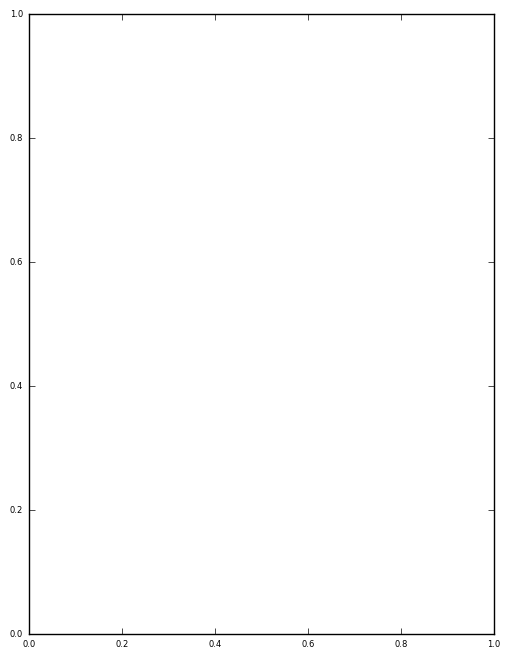

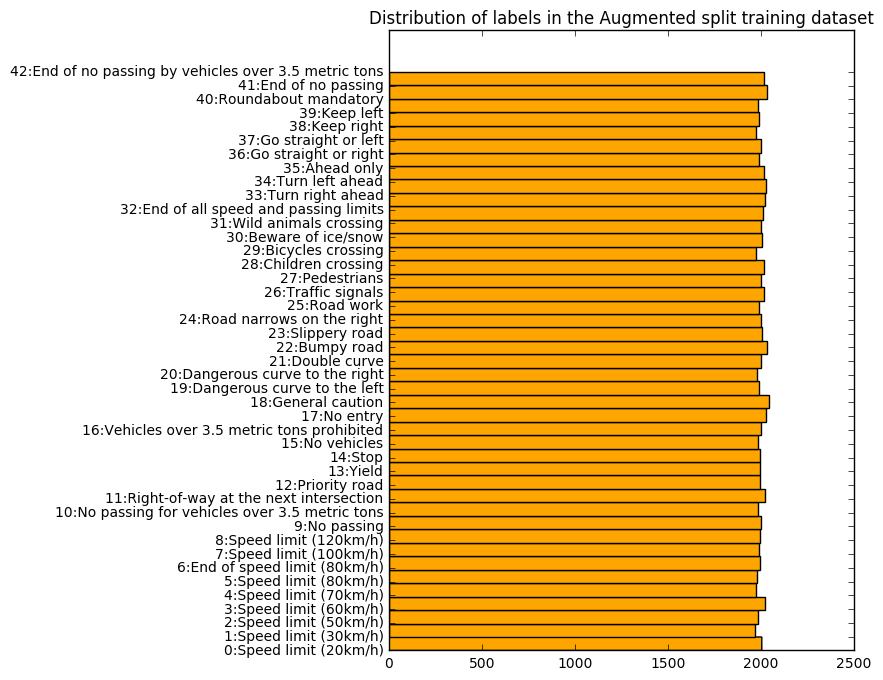

In [16]:
# Reloading matplotlib if it was previously shutdown
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


#What is the distribution of the data in the training file (per label)
hist_xticks = ['{}:{}'.format(t[0],t[1].decode('UTF-8')) for t in labels]

print('Displaying distribution from final augmented dataset')
fig = plt.figure(figsize=(6,8))

ax = plt.subplot() # Defines ax variable by creating an empty plot

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(6) # Size here overrides font_prop
    
#plt.hist(y_train_all_gen, bins=len(labels), orientation="horizontal", color='orange')
#plt.yticks( np.arange(len(labels)), hist_xticks,  rotation=0)
#plt.title('Distribution of labels in the Augmented dataset')
#plt.show()

print('Displaying distribution from split augmented dataset \n(excluding the validation)')
fig = plt.figure(figsize=(6,8))

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(6) # Size here overrides font_prop
    
plt.hist(y_train, bins=len(labels), orientation="horizontal", color='orange')
plt.yticks( np.arange(len(labels)), hist_xticks,  rotation=0)
plt.title('Distribution of labels in the Augmented split training dataset')
plt.show()



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [17]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

#I will also choose to start this work using a Leaky-ReLU rather and a pure ReLU in order to avoid the "vanishing gradients" issue.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [18]:
import tensorflow as tf


# Calculate weights shape for a "VALID" padding convolution
import math
def conv_weight_shape(in_height=28, filter_height=3, strides=1):
    out_height = math.ceil(float(in_height - filter_height + 1) / float(strides))
    return out_height

# Let's try!
print(conv_weight_shape(in_height=14, filter_height=5, strides=1))


# Creating reusable function for creating weights and naming them in the network
def add_weights(weights_dict, name, shape, stddev=0.02):
    weights_dict[name] = tf.Variable(tf.random_normal(shape, stddev=stddev), name=name)
    return weights_dict

# Creating reusable function for creating weights and naming them in the network
def add_bias(bias_dict, name, shape, mean=0.1, stddev=0.05):
    bias_dict[name] = tf.Variable(tf.random_normal(shape, mean=mean, stddev=stddev), name=name)
    return bias_dict

# Creating reusable function for creating convolutional layer
# weights_dict is in the form {'weight_name1' : weights_values1, ...}
def conv2d(x, weights_dict,weights_name, bias_dict, bias_name, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, weights_dict[weights_name], strides=[1, strides, strides,  1], padding=padding)
    x = tf.nn.bias_add(x, bias_dict[bias_name])
    return x

10


In [155]:
## Architecture for LeNet

from tensorflow.contrib.layers import flatten

def LeNet(x, dropout):    
    # Hyperparameters
    mu = 0
    sigma = math.sqrt(3./(32*32*3 + 28*28*6))
    alpha = 1e-4
    
    weights = dict()
    biases = dict()
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    in_channels =  x.get_shape()[-1].value
    shape = [filter_height, filter_width, in_channels, out_channels] = [5, 5, in_channels, 6]
    weights =  add_weights(weights, 'w1_conv', shape, stddev=sigma )
    biases =  add_bias(biases, 'b1_conv', [shape[-1]])
    conv_layer1 = conv2d(x, weights,'w1_conv', biases, 'b1_conv')
    
    # TODO: Activation.
    # layer1 = tf.nn.relu(conv_layer1)
    layer1 = tf.maximum(alpha*conv_layer1,conv_layer1)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    pool_strides = pool_filter_shape = [1, 2, 2, 1]
    padding = 'VALID'
    pooling_layer1 = tf.nn.max_pool(layer1, pool_filter_shape, pool_strides, padding)
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    in_channels =  pooling_layer1.get_shape()[-1].value
    shape = [filter_height, filter_width, in_channels, out_channels] = [5, 5, in_channels, 16]
    weights =  add_weights(weights, 'w2_conv', shape)
    biases =  add_bias(biases, 'b2_conv', [shape[-1]])
    conv_layer2 = conv2d(pooling_layer1, weights,'w2_conv', biases, 'b2_conv')
    
    # TODO: Activation.
    # layer2 = tf.nn.relu(conv_layer2)
    layer2 = tf.maximum(alpha*conv_layer2,conv_layer2)
    
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    pooling_layer2 = tf.nn.max_pool(layer2, pool_filter_shape, pool_strides, padding)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat_layer2 = tf.contrib.layers.flatten(pooling_layer2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    in_channels =  flat_layer2.get_shape()[-1].value
    shape = [in_channels, 120]
    weights = add_weights(weights,  'w3_full', shape)
    biases = add_bias(biases,  'b3_full', [shape[-1]])
    full_layer3 = tf.matmul(flat_layer2, weights['w3_full']) + biases['b3_full']

    # TODO: Activation.
    # layer3 = tf.nn.relu(full_layer3)
    layer3 = tf.maximum(alpha*full_layer3,full_layer3)
    layer3 = tf.nn.dropout(layer3, dropout)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    in_channels =  layer3.get_shape()[-1].value
    shape = [in_channels, 84]
    weights = add_weights(weights,  'w4_full', shape)
    biases = add_bias(biases,  'b4_full', [shape[-1]])
    full_layer4 = tf.matmul(layer3, weights['w4_full']) + biases['b4_full']

    # TODO: Activation.
    #layer4 = tf.nn.relu(full_layer4)
    layer4 = tf.maximum(alpha*full_layer4,full_layer4)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    in_channels =  layer4.get_shape()[-1].value
    shape = [in_channels, 43]
    weights = add_weights(weights,  'w5_full', shape)
    biases = add_bias(biases,  'b5_full', [shape[-1]])
    full_layer5 = tf.matmul(layer4, weights['w5_full']) + biases['b5_full']
    
    logits = full_layer5
    
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


logits = LeNet(x, keep_prob)
label_index = tf.argmax(logits, axis=1, name='calculatedLabel', dimension=None)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)



rate = 0.002
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [156]:
# Evaluate the Accuracy of the model

def evaluate(accuracy_operation, X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


In [157]:

def train(netName, training_operation, accuracy_operation, 
          X_train, y_train, X_validation, y_validation,
          EPOCHS, BATCH_SIZE, dropout):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
        
        validation_accuracy_values = list()
        training_accuracy_values = list()
        
        print("Training...")
        for i in range(EPOCHS):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,  keep_prob: dropout})

            training_accuracy = evaluate(accuracy_operation, X_train, y_train, BATCH_SIZE)
            validation_accuracy = evaluate(accuracy_operation, X_validation, y_validation, BATCH_SIZE)
            print("EPOCH {}: ".format(i+1), "Training Accuracy = {:.3f}, ".format(training_accuracy),
                  "Validation Accuracy = {:.3f}".format(validation_accuracy))
            validation_accuracy_values.append(validation_accuracy)
            training_accuracy_values.append(training_accuracy)

        saver.save(sess, netName)
        print("Model saved")
        return (training_accuracy_values, validation_accuracy_values)
        

In [158]:
### Train your model here.
### Feel free to use as many code cells as needed.
dropout = .8  # Dropout, probability to keep units
EPOCHS = 20
BATCH_SIZE = 256


In [159]:
# Train the neural network

lenet_training_accuracies, lenet_valid_accuracies = train('lenet', training_operation, accuracy_operation,
                              X_train, y_train, X_validation, y_validation, EPOCHS, BATCH_SIZE, dropout)

Training...
EPOCH 1:  Training Accuracy = 0.302,  Validation Accuracy = 0.299
EPOCH 2:  Training Accuracy = 0.525,  Validation Accuracy = 0.516
EPOCH 3:  Training Accuracy = 0.653,  Validation Accuracy = 0.640
EPOCH 4:  Training Accuracy = 0.732,  Validation Accuracy = 0.720
EPOCH 5:  Training Accuracy = 0.779,  Validation Accuracy = 0.763
EPOCH 6:  Training Accuracy = 0.825,  Validation Accuracy = 0.806
EPOCH 7:  Training Accuracy = 0.840,  Validation Accuracy = 0.823
EPOCH 8:  Training Accuracy = 0.878,  Validation Accuracy = 0.860
EPOCH 9:  Training Accuracy = 0.896,  Validation Accuracy = 0.876
EPOCH 10:  Training Accuracy = 0.902,  Validation Accuracy = 0.881
EPOCH 11:  Training Accuracy = 0.912,  Validation Accuracy = 0.893
EPOCH 12:  Training Accuracy = 0.921,  Validation Accuracy = 0.902
EPOCH 13:  Training Accuracy = 0.932,  Validation Accuracy = 0.914
EPOCH 14:  Training Accuracy = 0.940,  Validation Accuracy = 0.922
EPOCH 15:  Training Accuracy = 0.946,  Validation Accuracy 

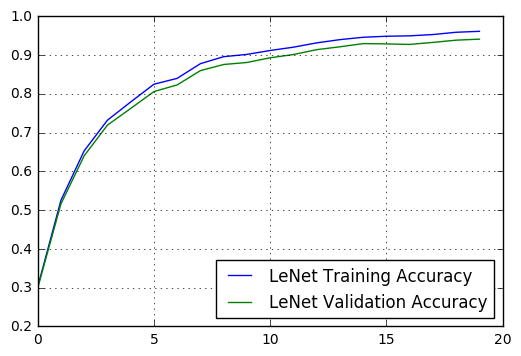

In [160]:
plt.plot(lenet_training_accuracies,label='LeNet Training Accuracy')
plt.plot(lenet_valid_accuracies,label='LeNet Validation Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [24]:
# Evaluate the model

with tf.Session() as sess:
    dropout = 1
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(accuracy_operation, X_test, y_test, BATCH_SIZE)
    print("Test Accuracy = {:.1f}% on {} examples".format(test_accuracy*100,len(y_test)))




Test Accuracy = 88.1% on 12630 examples


Trying with some random image
Label: Speed limit (70km/h)
Classified as: Speed limit (70km/h)


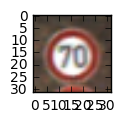

Label: Speed limit (80km/h)
Classified as: Speed limit (80km/h)


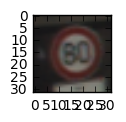

Label: Speed limit (100km/h)
Classified as: Speed limit (100km/h)


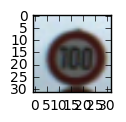

Label: Speed limit (50km/h)
Classified as: Speed limit (50km/h)


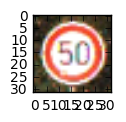

Label: Go straight or right
Classified as: Go straight or right


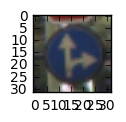

In [25]:
import random

print('Trying with some random image')

with tf.Session() as sess:
    dropout = 1
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    for i in range(5):
        index = random.randint(0, len(X_test))
        print('Label:', labels[y_test[index]][1].decode('UTF-8'))
        image = X_test[index].squeeze()
        idx = sess.run(label_index, feed_dict={x: image.reshape(1, 32,32,3) ,  keep_prob: dropout} )
        print('Classified as:',  labels[idx][0][1].decode('UTF-8'))
        image = cv2.cvtColor(np.uint8(np.clip(image*255+128, 0, 255)),
                             cv2.COLOR_YUV2RGB)
        plt.figure(figsize=(1,1))
        plt.imshow(image)
        plt.show()

In [26]:
# Evaluate the classifier output on many values of the model

def classifier(tf_session, classify_operation, X_data, y_data, BATCH_SIZE):
    num_examples = len(X_data)
    y_pred = np.empty(0)
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        idx = tf_session.run(classify_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.} )
        y_pred = np.hstack( (y_pred, idx.flatten()) ).astype(np.int)
    return y_pred

with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        y_pred = classifier(sess, label_index, X_test, y_test, BATCH_SIZE)


In [27]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)


    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round(cm[i, j]*100)/100,
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Normalized confusion matrix
[[ 0.45  0.25  0.   ...,  0.    0.    0.  ]
 [ 0.03  0.82  0.05 ...,  0.    0.    0.  ]
 [ 0.    0.06  0.89 ...,  0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.   ...,  0.94  0.    0.  ]
 [ 0.    0.    0.   ...,  0.02  0.78  0.12]
 [ 0.    0.    0.   ...,  0.    0.33  0.67]]


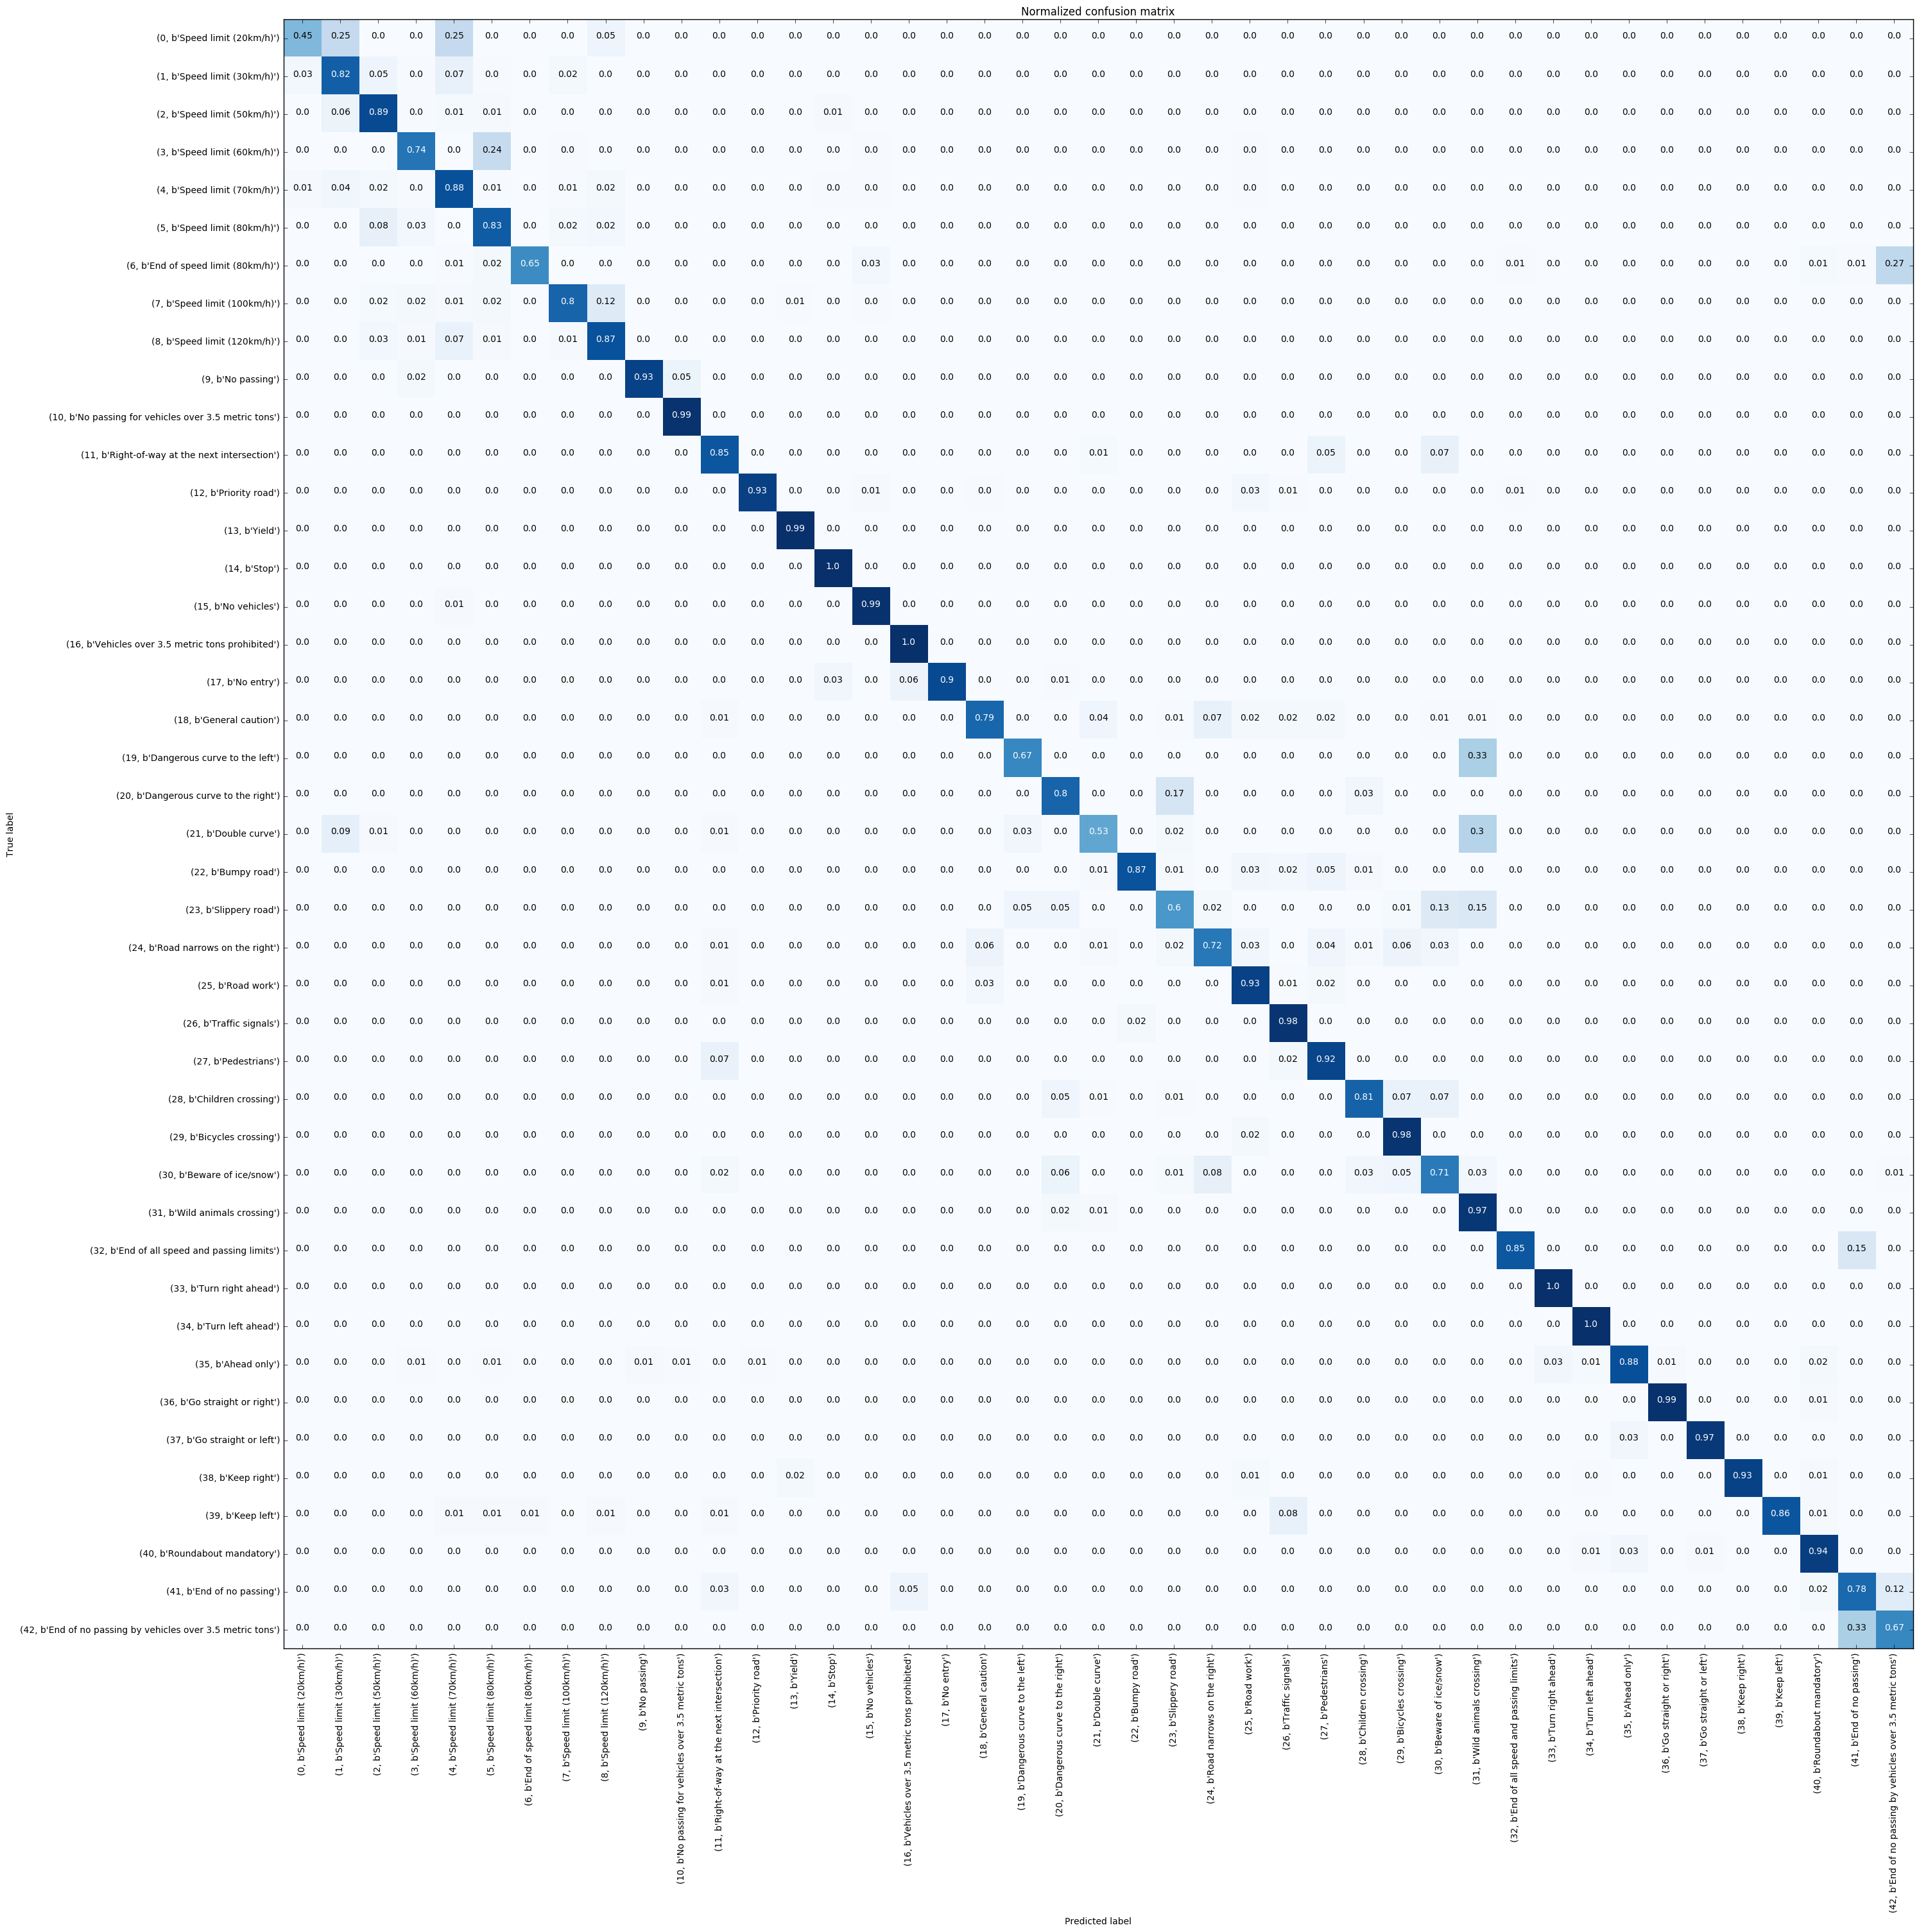

In [28]:
from project_lib import utils


# Compute confusion matrix
cnf_matrix = utils.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plt.figure(figsize=(30,30))
plot_confusion_matrix(cnf_matrix, classes=labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

#### Attempt to implement part of Inception-Resnet architecture from Google
https://arxiv.org/pdf/1602.07261v2.pdf


In [180]:
class Inception_ResNet():
    def __init__(self):
        self.weights = dict()
        self.biases = dict()
    
    # Implementing general Conv block
    def conv(self, x, kernel=[1, 1], depth=32, strides=1, layer_name=None, padding='SAME'):
        """
        x: (input) the 2D input to the convolution
        kernel: (input) array containing the kernel size for the convolution
        depth: (input) scalar containing the depth size for the convolution
        strides: (input) scalar containing the strides size for the convolution
        layer_name: (input) string name for the convolution
        returns: convolution operation
        """
        # Convolutional Layer Input = N x M x in_channels.
        # Convolutional Layer Output = K x L x depth
        in_channels =  x.get_shape()[-1].value
        shape =  [kernel[0], kernel[1], in_channels, depth]
        
        # Xavier init
        num_inputs = np.prod(shape)
        sigma =  np.float32(math.sqrt(3./num_inputs))

        weight_name = 'w_{}'.format(layer_name)
        bias_name = "b_{}".format(layer_name)

        self.weights =  add_weights(self.weights, weight_name, shape, stddev=sigma )
        self.biases =  add_bias(self.biases, bias_name, [shape[-1]])
        return conv2d(x, self.weights, weight_name, self.biases, bias_name, strides, padding=padding)

    # Implementing the Stem of the Inception-ResNet-v2 network
    def stem_inception_resnet(self,x):
        out = self.conv(x, kernel=[3, 3], depth=32, strides=2, layer_name='stem_conv1', padding='VALID')
        out = self.conv(out, kernel=[3, 3], depth=32, strides=1, layer_name='stem_conv2', padding='VALID')
        out_fork = self.conv(out, kernel=[3, 3], depth=64, strides=1, layer_name='stem_conv3')
        
        out_fork1 = self.conv(out_fork, kernel=[3, 3], depth=96, strides=2, layer_name='stem_conv4', padding='VALID')
        
        pool_filter_shape = [1, 3, 3, 1]
        pool_strides = [1, 2, 2, 1]
        pooling_layer1 = tf.nn.max_pool(out_fork, pool_filter_shape, pool_strides,
                                        padding = 'VALID')
        
        # Filter concat
        out_concat1 = tf.concat(3, [out_fork1, pooling_layer1])
        
        # Short path
        out_fork2_short = self.conv(out_concat1, kernel=[1, 1], depth=64, layer_name='stem_conv5')
        out_fork2_short = self.conv(out_fork2_short, kernel=[3, 3], depth=96, layer_name='stem_conv6', padding='VALID')
        
        out_fork2_long = self.conv(out_concat1, kernel=[1, 1], depth=64, layer_name='stem_conv7')
        out_fork2_long = self.conv(out_fork2_long, kernel=[7, 1], depth=64, layer_name='stem_conv8')
        out_fork2_long = self.conv(out_fork2_long, kernel=[1, 7], depth=64, layer_name='stem_conv9')
        out_fork2_long = self.conv(out_fork2_long, kernel=[3, 3], depth=96, layer_name='stem_conv10', padding='VALID')
        
        # Filter concat
        out_concat2 = tf.concat(3, [out_fork2_short, out_fork2_long])
       
        out_fork_last_conv = self.conv(out_concat2, kernel=[3, 3], depth=192, layer_name='stem_conv11', padding='VALID')
        
        pool_filter_shape = [1, 2, 2, 1]
        pool_strides = [1, 2, 2, 1]
        pooling_layer2 = tf.nn.max_pool(out_concat2, pool_filter_shape, pool_strides,
                                        padding = 'VALID')
        
        # Filter concat
        out_stem = tf.concat(3, [out_fork_last_conv, pooling_layer2])
        
        return out_stem
    
    def head(self, x, dropout=1.0):
         # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
        out_stem = tf.contrib.layers.flatten(self.stem_inception_resnet(x))

        #out_stem = tf.maximum(0.001*out_stem,out_stem)
        #out_stem = tf.nn.dropout(out_stem, dropout)
        
        in_channels =  out_stem.get_shape()[-1].value
        shape = [in_channels, 43]
        self.weights = add_weights(self.weights,  'w5_full', shape)
        self.biases = add_bias(self.biases,  'b5_full', [shape[-1]])
        full_layer5 = tf.matmul(out_stem, self.weights['w5_full']) + self.biases['b5_full']
        
        
        full_layer5 = tf.maximum(0.001*full_layer5,full_layer5)
        full_layer5 = tf.nn.dropout(full_layer5, dropout)
        
        logits = full_layer5
        return logits

In [ ]:

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

net = Inception_ResNet()
logits = net.head(x,keep_prob)

label_index = tf.argmax(logits, axis=1, name='calculatedLabel', dimension=None)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)



rate = 0.00015
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

dropout = 0.8
EPOCHS = 20
BATCH_SIZE = 256

# Train the neural network

incep_training_accuracies, incep_valid_accuracies = train('inception', training_operation, accuracy_operation,
                              X_train, y_train, X_validation, y_validation, EPOCHS, BATCH_SIZE, dropout)

Training...
EPOCH 1:  Training Accuracy = 0.024,  Validation Accuracy = 0.022
EPOCH 2:  Training Accuracy = 0.024,  Validation Accuracy = 0.022
EPOCH 3:  Training Accuracy = 0.024,  Validation Accuracy = 0.022
EPOCH 4:  Training Accuracy = 0.178,  Validation Accuracy = 0.175


In [179]:
Tensor("BiasAdd_55:0", shape=(?, 4, 4, 96), dtype=float32)
Tensor("BiasAdd_69:0", shape=(?, 4, 4, 96), dtype=float32)


SyntaxError: invalid syntax (<ipython-input-179-0cfcc5428db1>, line 1)

Also try https://arxiv.org/abs/1606.02147

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [30]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [31]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.